In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

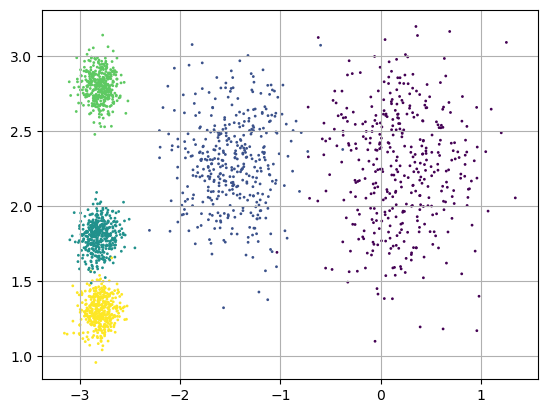

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, s=1)
plt.grid()
plt.show()

Well clustered, isn't it?

In [4]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [5]:
y_pred is kmeans.labels_

True

In [6]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

### Silhouette Coefficient to find optimal number of clusters

In [14]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.6555176425728279

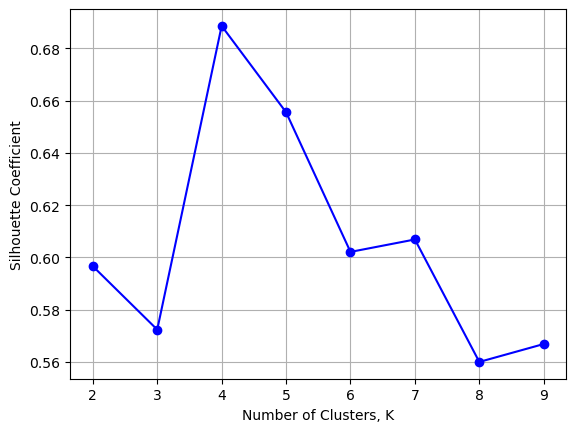

In [59]:
clusters = np.arange(2,10)
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X) for k in range(1,10)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
plt.plot(clusters, silhouette_scores, "bo-")
plt.xlabel("Number of Clusters, K")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.show()